In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/Users/nanda/Downloads/Data Files/3. ST Academy - Decision Trees resource files/Movie_regression.csv",header=0)

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [5]:
df.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
dtype: int64

In [6]:
df.Time_taken.head()

0    109.60
1    146.64
2    147.88
3    185.36
4    176.48
Name: Time_taken, dtype: float64

## Missing Values Imputation

In [7]:
mean = df.Time_taken.mean()

In [8]:
mean

157.3914979757085

In [9]:
df = df.fillna(mean)

In [10]:
df.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
dtype: int64

In [11]:
df = pd.get_dummies(df,drop_first=True)

In [12]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [13]:
X = df.loc[:,df.columns!='Collection']

In [14]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [15]:
y = df['Collection']

In [16]:
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

## Splitting the train and test model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train.shape,y_train.shape,X_test.shape

((404, 19), (404,), (102, 19))

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
model = DecisionTreeRegressor(max_depth=10)

In [22]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [23]:
y_train_pred = model.predict(X_train)

In [24]:

y_test_pred = model.predict(X_test)

## Performance of the Model

In [25]:
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
r2_score(y_train,y_train_pred)

0.9928873151947205

In [27]:
r2_score(y_test,y_test_pred)

0.5439321704772617

In [28]:
mean_squared_error(y_test,y_test_pred)

146819468.56629044

## Plotting of Decision Trees

In [29]:
from sklearn import tree

In [30]:
dot_data = tree.export_graphviz(model,out_file= None)

In [31]:
from IPython.display import Image

In [32]:
import pydotplus

In [33]:
graph = pydotplus.graph_from_dot_data(dot_data)

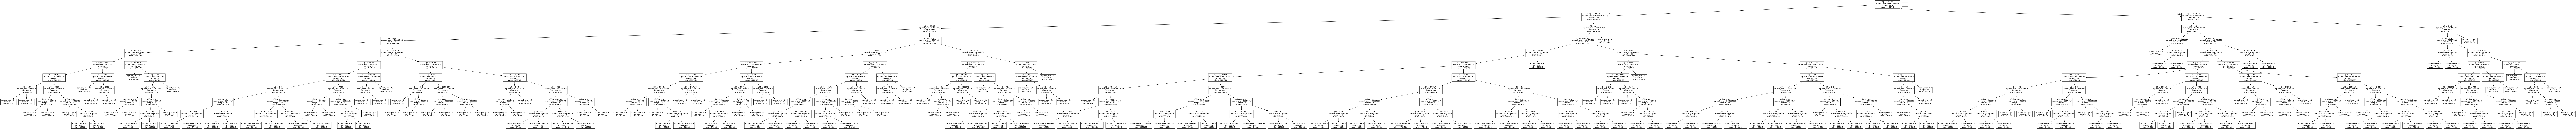

In [34]:
Image(graph.create_png())

## Pruning

## Maximum Number of levels in a tree

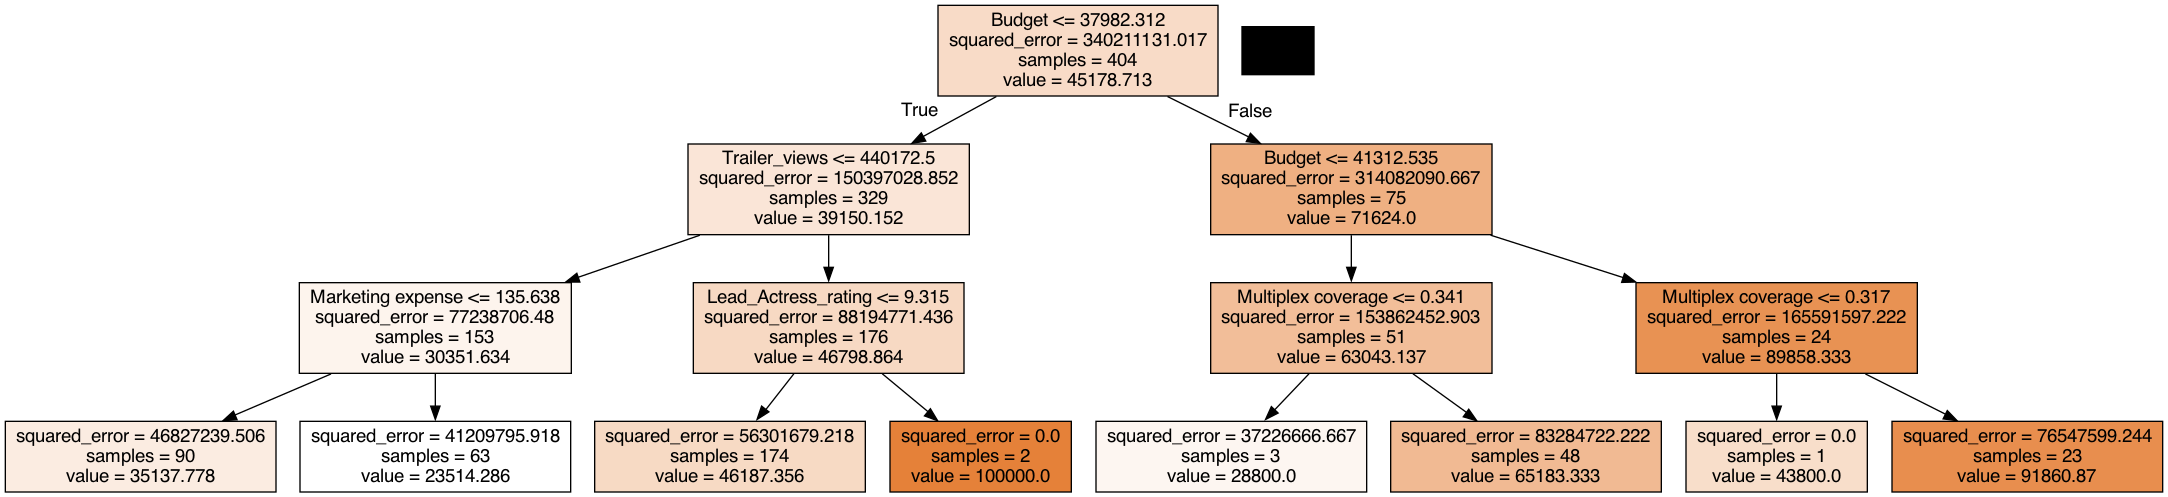

In [35]:
from sklearn.tree import DecisionTreeRegressor
regtree1 = DecisionTreeRegressor(max_depth=3)
regtree1.fit(X_train,y_train)
dot_data = tree.export_graphviz(regtree1,feature_names=X_train.columns,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Minimum number of internal Nodes

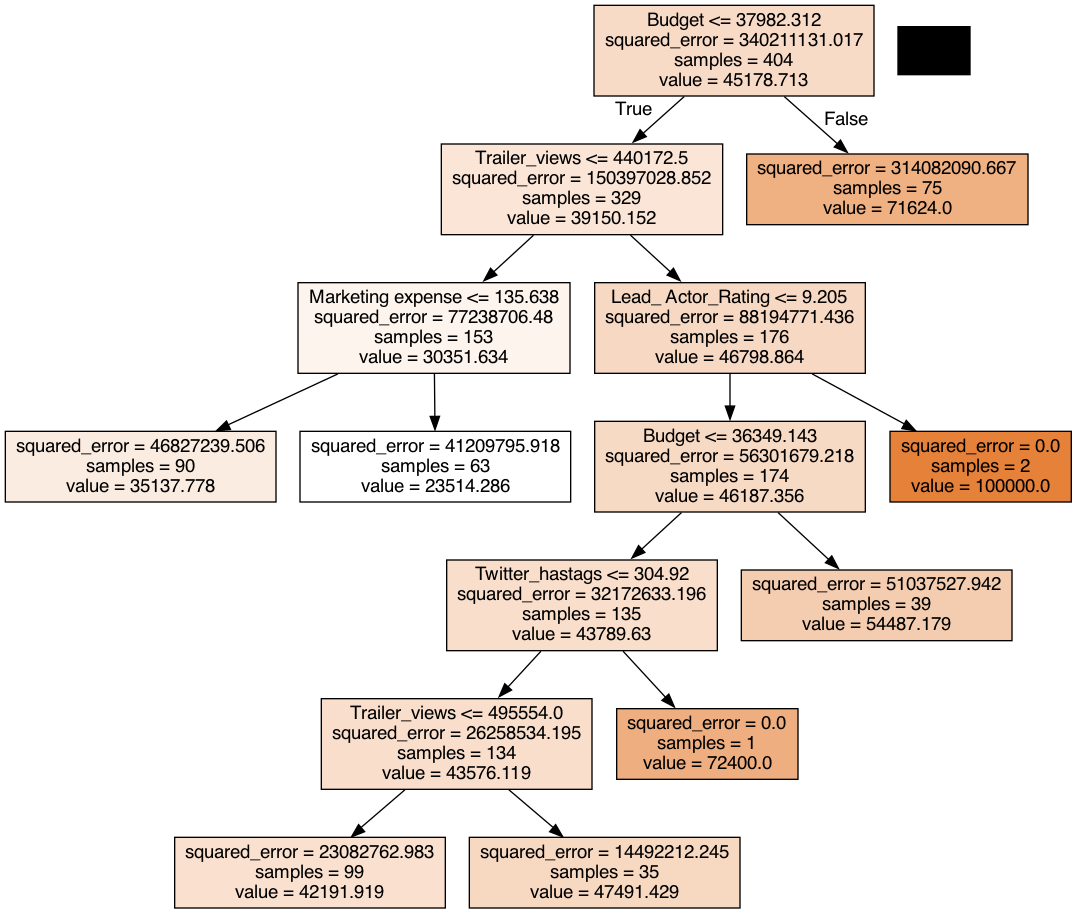

In [36]:
regtree2 = DecisionTreeRegressor(min_samples_split=100)
regtree2.fit(X_train,y_train)
dot_data = tree.export_graphviz(regtree2,feature_names=X_train.columns,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Minimum number of Leaf Nodes

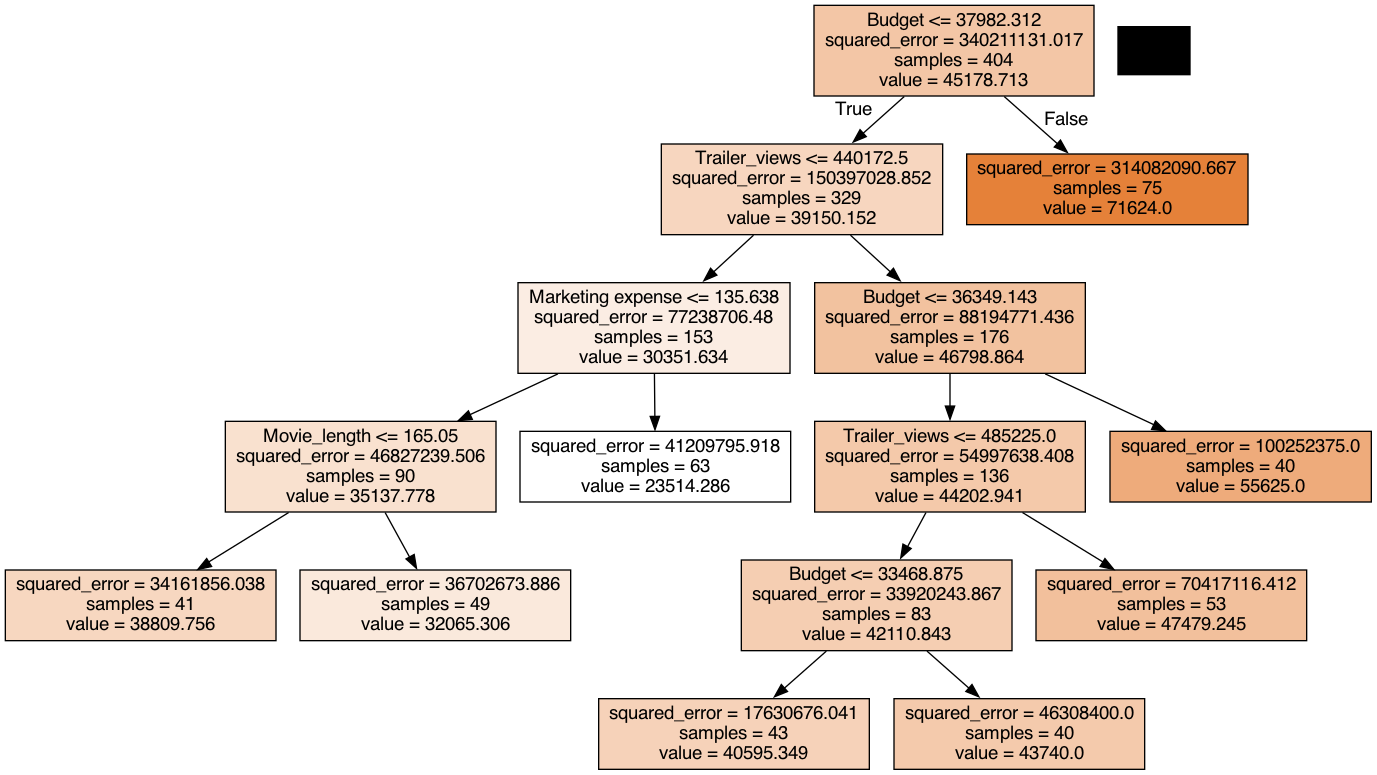

In [37]:
regtree3 = DecisionTreeRegressor(min_samples_leaf=40,max_depth=5)
regtree3.fit(X_train,y_train)
dot_data = tree.export_graphviz(regtree3,out_file=None,feature_names=X_train.columns,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


## Classification Using Decision Tree

In [38]:
df = pd.read_csv("/Users/nanda/Downloads/Data Files/3. ST Academy - Decision Trees resource files/Movie_classification.csv",header=0)

In [39]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [40]:
df.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [41]:
df = df.fillna(df.Time_taken.mean())

In [42]:
df.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

In [43]:
df = pd.get_dummies(df,drop_first=True)

In [44]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [45]:
X = df.loc[:,df.columns != 'Start_Tech_Oscar']
y = df.Start_Tech_Oscar

In [46]:
X.shape

(506, 20)

## Splitting the data into traning and testing

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

## Model

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model = DecisionTreeClassifier(max_depth=3)

In [50]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [54]:
confusion_matrix(y_test,y_pred)

array([[45,  1],
       [38, 18]])

In [55]:
accuracy_score(y_test,y_pred)

0.6176470588235294

## Plotting the decision tree

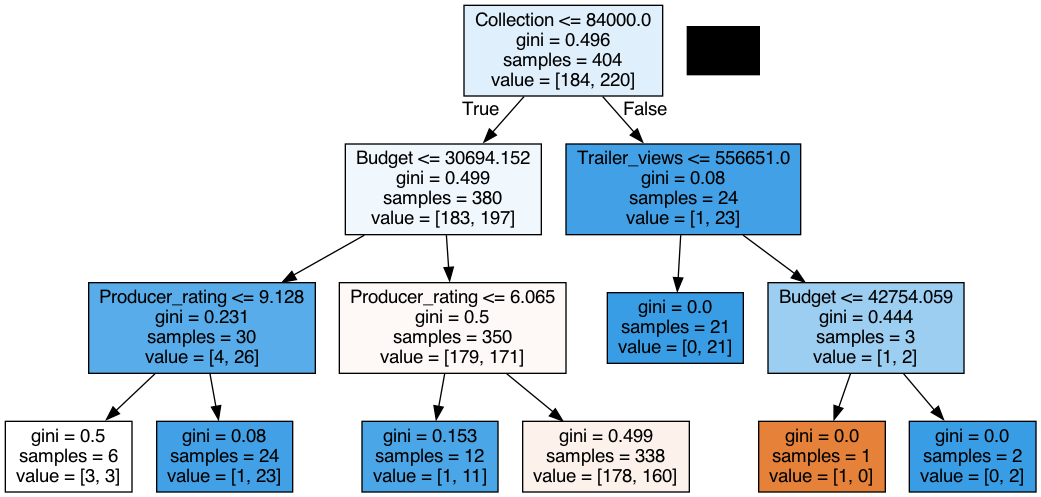

In [56]:
dot_data = tree.export_graphviz(model,out_file=None,feature_names=X_train.columns,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

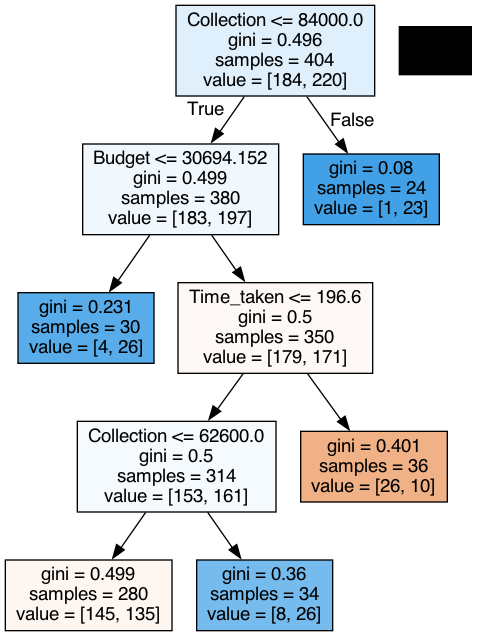

In [57]:
clf_tree = DecisionTreeClassifier(min_samples_leaf=20,max_depth=4)
clf_tree.fit(X_train,y_train)
dot_data = tree.export_graphviz(clf_tree,out_file=None,feature_names=X_train.columns,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [58]:
accuracy_score(y_test,clf_tree.predict(X_test))

0.6176470588235294

In [59]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()

In [60]:
from sklearn.ensemble import BaggingClassifier

In [61]:
bag_clf = BaggingClassifier(base_estimator=clf_tree,n_estimators=10000,bootstrap=True,n_jobs=-1,random_state=42)

In [62]:
bag_clf.fit(X_train,y_train)

/Users/nanda/miniforge3/envs/env_new/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10000,
                  n_jobs=-1, random_state=42)

In [63]:
confusion_matrix(y_test,bag_clf.predict(X_test))

array([[26, 20],
       [10, 46]])

In [64]:
accuracy_score(y_test,bag_clf.predict(X_test))

0.7058823529411765

## Plotting the graph

In [65]:
from sklearn import ensemble

In [66]:
dot_data = tree.export_graphviz(clf_tree,feature_names=X_train.columns,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10000,n_jobs=-1,random_state=42)

In [68]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=42)

In [69]:
confusion_matrix(y_test,rf_clf.predict(X_test))

array([[22, 24],
       [13, 43]])

In [70]:
accuracy_score(y_test,rf_clf.predict(X_test))

0.6372549019607843

## Using CV Grid Search to find the best Params

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [73]:
params_grid = {"max_features":[4,5,6,7,8,9,10],
              "min_samples_split":[2,3,10]}

In [74]:
grid_search = GridSearchCV(rf_clf,params_grid,n_jobs=-1,cv=5,scoring='accuracy')

In [75]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [76]:
grid_search.best_params_

{'max_features': 9, 'min_samples_split': 10}

In [77]:
cvrf_clf = grid_search.best_estimator_

In [78]:
confusion_matrix(y_test,cvrf_clf.predict(X_test))


array([[24, 22],
       [12, 44]])

In [79]:
accuracy_score(y_test,cvrf_clf.predict(X_test))

0.6666666666666666

In [80]:

from pycaret.classification import *

In [81]:
df2 = pd.read_csv("/Users/nanda/Downloads/Data Files/3. ST Academy - Decision Trees resource files/Movie_classification.csv",header=0)

In [82]:
df2.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [83]:
df2.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [84]:
df2 =df2.fillna(df2.Time_taken.sum())

In [85]:
cat_varabs = ["3D_available","Genre"]

In [86]:
experiment = setup(df2,target="Start_Tech_Oscar",categorical_features=cat_varabs,n_jobs=-1)

,Description,Value
0,Session id,2418
1,Target,Start_Tech_Oscar
2,Target type,Binary
3,Original data shape,"(506, 19)"
4,Transformed data shape,"(506, 22)"
5,Transformed train set shape,"(354, 22)"
6,Transformed test set shape,"(152, 22)"
7,Ordinal features,1
8,Numeric features,16
9,Categorical features,2


In [87]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6131,0.6670,0.6689,0.6408,0.6518,0.2160,0.2198,0.0170
ridge,Ridge Classifier,0.6128,0.0000,0.6379,0.6506,0.6418,0.2205,0.2226,0.0140
lightgbm,Light Gradient Boosting Machine,0.5902,0.6290,0.6366,0.6232,0.6283,0.1709,0.1718,0.0510
et,Extra Trees Classifier,0.5883,0.6312,0.6284,0.6191,0.6219,0.1705,0.1713,0.0480
rf,Random Forest Classifier,0.5710,0.6285,0.6271,0.6074,0.6144,0.1312,0.1322,0.0590
dt,Decision Tree Classifier,0.5706,0.5659,0.6171,0.6029,0.6083,0.1326,0.1339,0.0180
gbc,Gradient Boosting Classifier,0.5681,0.6186,0.6326,0.6034,0.6145,0.1240,0.1251,0.0480
qda,Quadratic Discriminant Analysis,0.5566,0.5707,0.6176,0.5987,0.5958,0.1024,0.1091,0.0180
lr,Logistic Regression,0.5508,0.6012,0.6121,0.5895,0.5960,0.0905,0.0930,0.0630
nb,Naive Bayes,0.5483,0.5955,0.3853,0.6323,0.4687,0.1275,0.1362,0.0180


In [88]:
from pycaret.regression import *
import pandas as pd

In [89]:
df3 = pd.read_csv("/Users/nanda/Downloads/Data Files/3. ST Academy - Decision Trees resource files/Movie_regression.csv",header=0)

In [90]:
df3.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [91]:
cat_varas = ['3D_available',"Genre"]

In [92]:
df3.dtypes

Marketing expense      float64
Production expense     float64
Multiplex coverage     float64
Budget                 float64
Movie_length           float64
Lead_ Actor_Rating     float64
Lead_Actress_rating    float64
Director_rating        float64
Producer_rating        float64
Critic_rating          float64
Trailer_views            int64
3D_available            object
Time_taken             float64
Twitter_hastags        float64
Genre                   object
Avg_age_actors           int64
Num_multiplex            int64
Collection               int64
dtype: object

In [93]:
experiment  = setup(df3,categorical_features=cat_varas,target="Collection")

,Description,Value
0,Session id,2537
1,Target,Collection
2,Target type,Regression
3,Original data shape,"(506, 18)"
4,Transformed data shape,"(506, 21)"
5,Transformed train set shape,"(354, 21)"
6,Transformed test set shape,"(152, 21)"
7,Ordinal features,1
8,Numeric features,15
9,Categorical features,2


In [94]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4903.7088,54425096.4433,6938.3235,0.8234,0.1693,0.1253,0.0340
et,Extra Trees Regressor,4948.4952,54734333.5860,7030.2752,0.8209,0.1695,0.1268,0.0450
rf,Random Forest Regressor,5168.2100,58002623.9508,7299.8409,0.8037,0.1763,0.1326,0.0590
lightgbm,Light Gradient Boosting Machine,5360.3704,65563220.0907,7591.1187,0.7972,0.1829,0.1361,0.0170
ada,AdaBoost Regressor,5843.7476,67588824.8207,7913.3862,0.7703,0.1985,0.1559,0.0250
ridge,Ridge Regression,7053.0758,102765653.7264,9749.6270,0.6642,0.2894,0.1837,0.0140
en,Elastic Net,7058.2861,103161327.3440,9760.8583,0.6634,0.3754,0.1848,0.0140
llar,Lasso Least Angle Regression,7101.9384,103460413.5033,9795.3352,0.6614,0.2967,0.1851,0.0130
lasso,Lasso Regression,7105.0423,103498759.0147,9797.6961,0.6612,0.2968,0.1852,0.0150
lr,Linear Regression,7106.1655,103515278.4217,9799.2615,0.6611,0.2964,0.1852,0.0140


# Bagging

In [96]:
from sklearn import tree
clf_tree = DecisionTreeClassifier()

In [97]:
from sklearn.ensemble import BaggingClassifier

In [102]:
bag_clf = BaggingClassifier(base_estimator=clf_tree,n_estimators=10000,bootstrap=True,n_jobs=-1,random_state=42)

In [103]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        random_state=None,
                                                        splitter='best'),
                  bootstrap=True, bootstrap_features=False, estimator=None,
                  max_features=1.0, max_samples=1.0, n_estimators=10000,
                  n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

In [104]:
confusion_matrix(y_test,bag_clf.predict(X_test))

array([[26, 20],
       [10, 46]])

In [105]:
accuracy_score(y_test,bag_clf.predict(X_test))

0.7058823529411765